# Dataset 

https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset

# Problem definition 

We chose a dataset combining different types of food, world population obesity and undernourished rate, and global covid cases count from around the world.

The idea is to understand how a healthy eating style could help combat the coronavirus, distinguishing the diet patterns from countries with lower COVID infection rate.

Our goal here is to provide diet recommendations base on our findings.

Each dataset provides different diet measure different categories of food, depending on what we want to focus on, so we have

- fat quantity,
- energy intake (kcal),
- food supply quantity (kg),
- protein for different categories of food

To which have been added:

- obesity rate
- undernourished rate
- the most up to date confirmed/deaths/recovered/active cases.

We are going to focus on the fat quantity dataset.

Let's start by loading the data

In [58]:
# On importe les modules dont on pourrait avoir besoin dans le notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# On importe les données
fat_quantity = pd.read_csv("../data/Fat_Supply_Quantity_Data.csv")

 ## Data Exploration and Processing

Now let's explore the dataset:
- check the head
- the columns
- the variable types

In [59]:
fat_quantity.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.125149,0.005058,0.098263,0.021827,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,1.733298,0.035800,0.874560,0.822939,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.208754,0.005882,0.137268,0.065604,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.050049,0.001144,0.027440,0.021465,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.151020,0.005102,0.140816,0.005102,98000.0,%


In [60]:
fat_quantity.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [61]:
len(fat_quantity.index)

170

Let's create a function to **check missing data** and unveil **the percentage of data missing** for each dataframe

In [62]:
# On veut une fonction qui donne le pourcentage de NaN dans notre df
def percentage_missing_data(df):
    """donne le pourcentage de NaN dans un dataframe"""
    nb_nan=df.isna().sum()
    percentage_nan=(nb_nan/len(fat_quantity.index))*100
    return percentage_nan
percentage_missing_data(fat_quantity)

Country                         0.000000
Alcoholic Beverages             0.000000
Animal Products                 0.000000
Animal fats                     0.000000
Aquatic Products, Other         0.000000
Cereals - Excluding Beer        0.000000
Eggs                            0.000000
Fish, Seafood                   0.000000
Fruits - Excluding Wine         0.000000
Meat                            0.000000
Miscellaneous                   0.000000
Milk - Excluding Butter         0.000000
Offals                          0.000000
Oilcrops                        0.000000
Pulses                          0.000000
Spices                          0.000000
Starchy Roots                   0.000000
Stimulants                      0.000000
Sugar Crops                     0.000000
Sugar & Sweeteners              0.000000
Treenuts                        0.000000
Vegetal Products                0.000000
Vegetable Oils                  0.000000
Vegetables                      0.000000
Obesity         

Delete the countries for which values are missing.

In [63]:
fat_quantity.dropna(axis=0,how='any',inplace=True)
fat_quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       154 non-null    object 
 1   Alcoholic Beverages           154 non-null    float64
 2   Animal Products               154 non-null    float64
 3   Animal fats                   154 non-null    float64
 4   Aquatic Products, Other       154 non-null    float64
 5   Cereals - Excluding Beer      154 non-null    float64
 6   Eggs                          154 non-null    float64
 7   Fish, Seafood                 154 non-null    float64
 8   Fruits - Excluding Wine       154 non-null    float64
 9   Meat                          154 non-null    float64
 10  Miscellaneous                 154 non-null    float64
 11  Milk - Excluding Butter       154 non-null    float64
 12  Offals                        154 non-null    float64
 13  Oilcr

Look at the different data types for each variable.

In [64]:
fat_quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       154 non-null    object 
 1   Alcoholic Beverages           154 non-null    float64
 2   Animal Products               154 non-null    float64
 3   Animal fats                   154 non-null    float64
 4   Aquatic Products, Other       154 non-null    float64
 5   Cereals - Excluding Beer      154 non-null    float64
 6   Eggs                          154 non-null    float64
 7   Fish, Seafood                 154 non-null    float64
 8   Fruits - Excluding Wine       154 non-null    float64
 9   Meat                          154 non-null    float64
 10  Miscellaneous                 154 non-null    float64
 11  Milk - Excluding Butter       154 non-null    float64
 12  Offals                        154 non-null    float64
 13  Oilcr

Explore the variables that are not of float type and see of you can convert them in to float type.

In [65]:
fat_quantity.Country # ne peut pas être converti en float car ce sont des strings

0                             Afghanistan
1                                 Albania
2                                 Algeria
3                                  Angola
5                               Argentina
                      ...                
165    Venezuela (Bolivarian Republic of)
166                               Vietnam
167                                 Yemen
168                                Zambia
169                              Zimbabwe
Name: Country, Length: 154, dtype: object

In [66]:
fat_quantity.Undernourished.value_counts() # on a des float mais certaines valeurs sont de "<2.5". On peut leur donner
# une valeur précise (inventée) pour qu'on ait plus que des floats dans la colonne.
fat_quantity.replace(to_replace='<2.5', value=2,inplace=True)

In [67]:
fat_quantity.Undernourished.value_counts() # OK ca a marché. Maintenant, on convertit la colonne en float
fat_quantity.Undernourished= pd.to_numeric(fat_quantity.Undernourished, downcast="float") # OK : dtype = float
fat_quantity.Undernourished

0      29.799999
1       6.200000
2       3.900000
3      25.000000
5       4.600000
         ...    
165    21.200001
166     9.300000
167    38.900002
168    46.700001
169    51.299999
Name: Undernourished, Length: 154, dtype: float32

In [68]:
fat_quantity["Unit (all except Population)"].value_counts() # cette colonne n'est pas très utile, on peut la supprimer
fat_quantity.drop(labels="Unit (all except Population)",axis=1,inplace=True)

In [69]:
fat_quantity.info() # on vérifie que tout est OK

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   154 non-null    object 
 1   Alcoholic Beverages       154 non-null    float64
 2   Animal Products           154 non-null    float64
 3   Animal fats               154 non-null    float64
 4   Aquatic Products, Other   154 non-null    float64
 5   Cereals - Excluding Beer  154 non-null    float64
 6   Eggs                      154 non-null    float64
 7   Fish, Seafood             154 non-null    float64
 8   Fruits - Excluding Wine   154 non-null    float64
 9   Meat                      154 non-null    float64
 10  Miscellaneous             154 non-null    float64
 11  Milk - Excluding Butter   154 non-null    float64
 12  Offals                    154 non-null    float64
 13  Oilcrops                  154 non-null    float64
 14  Pulses    

# Clustering

## Data preparation

Scale the dataset

In [71]:
# On veut standardiser toutes les données numériques

# on fait une liste de toutes les variables numériques -> tout sauf Country (on peut récupérer la sortie de df.columns)
continuous_features=['Alcoholic Beverages', 'Animal Products', 'Animal fats',
                   'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
                   'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
                   'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
                   'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
                   'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
                   'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
                   'Active', 'Population']

# on importe les modules et on fait la transformation via des pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

full_pipeline = make_column_transformer((make_pipeline(StandardScaler()), continuous_features),remainder='passthrough')
# on met l'argument remainder='passthrough' pour lui dire de pas drop le reste des colonnes du df sur lesquelles on n'a
# pas appliqué de transformation.

fat_quantity_scaled = full_pipeline.fit_transform(fat_quantity)

In [73]:
fat_quantity_scaled

array([[-0.11401464477494569, 0.15851008135610084, 0.6169246385343449,
        ..., -0.4659499241034403, -0.05531328228136886, 'Afghanistan'],
       [-0.11401464477494569, 1.4533108173389555, -0.2206214437217168,
        ..., 0.44241554435349867, -0.2761922033625789, 'Albania'],
       [-0.11401464477494569, -0.7440824455890636, -0.9730156142925407,
        ..., -0.4163124320632599, -0.022086580631330364, 'Algeria'],
       ...,
       [-0.11401464477494569, -0.9787100119936012, -0.6398423385227063,
        ..., -0.4903423478619119, -0.11101957044100237, 'Yemen'],
       [7.701854540132673, -1.346085741301569, -0.7598074090526099, ...,
        -0.4873321040005811, -0.1810471851545298, 'Zambia'],
       [-0.11401464477494569, -1.248717925713109, -0.3588290871968098,
        ..., -0.4792945136122503, -0.20259649746062403, 'Zimbabwe']],
      dtype=object)

In [48]:
# on vérifie que les données ont bien été transformées
fat_quantity_scaled.shape # les colonnes sont toutes présentes

(154, 31)

In [74]:
continuous_features.append('Country')

In [75]:
fat_quantity_scaled=pd.DataFrame(fat_quantity_scaled,columns=continuous_features) # les valeurs ont été transformées -> OK
fat_quantity_scaled

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Country
0,-0.114015,0.15851,0.616925,-0.117474,1.10089,-0.396178,-0.854818,-0.131477,-0.664272,-0.527002,...,-0.256098,0.256444,-1.47013,1.57225,-0.784373,-0.625624,-0.685271,-0.46595,-0.0553133,Afghanistan
1,-0.114015,1.45331,-0.220621,-0.117474,-0.55504,1.05839,-0.734257,0.122943,-0.0747985,-0.516304,...,-1.40851,1.67971,0.405822,-0.420978,0.236162,0.296928,-0.0340016,0.442416,-0.276192,Albania
2,-0.114015,-0.744082,-0.973016,-0.117474,-0.082496,0.409606,-0.673545,0.0472729,-1.16592,-0.105186,...,1.25483,1.01552,0.859001,-0.615233,-0.731317,-0.600903,-0.652549,-0.416312,-0.0220866,Algeria
3,-0.114015,-0.63328,-0.848871,-0.117474,0.643568,-1.20318,0.636349,-0.220267,0.439393,-0.305396,...,0.534938,-0.898797,-1.22773,1.16685,-0.832032,-0.743088,-0.744688,-0.46636,-0.0945194,Angola
4,-0.114015,1.24798,-0.253345,-0.117474,-0.96943,0.945835,-0.71064,-0.383906,2.29501,-0.776118,...,-0.22205,-0.582353,1.05924,-0.556112,1.23848,1.9368,1.70995,-0.185693,-0.015844,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.114015,-0.505556,-0.563946,-0.117474,-0.594724,-0.442292,-0.274656,0.500357,-0.445786,-0.658437,...,1.57246,-0.595558,0.711454,0.845905,-0.624253,-0.676841,-0.465938,-0.474359,-0.118248,Venezuela (Bolivarian Republic of)
150,-0.114015,1.6093,-0.0992232,-0.117474,-0.233206,-0.247521,0.319525,-0.151039,3.9069,-0.678305,...,-1.94117,1.61613,-1.72307,-0.159156,-0.862868,-0.776323,-0.766623,-0.490557,0.295259,Vietnam
151,-0.114015,-0.97871,-0.639842,-0.117474,2.17926,-0.600203,-0.475233,-0.328501,-0.241798,-0.384868,...,0.706562,-0.685552,-0.45838,2.34083,-0.859359,-0.716441,-0.763816,-0.490342,-0.11102,Yemen
152,7.70185,-1.34609,-0.759807,-0.117474,3.04257,-0.486131,0.195836,-0.471525,-0.939694,-0.433775,...,-0.520473,-0.734461,-1.25935,2.9996,-0.800547,-0.717506,-0.688264,-0.487332,-0.181047,Zambia


## Plot some data

Now, we want to visualize some variables for each state. To do so, we use plotly express to have the possibility to hover on a scatter plot and see the statistics per country clearer as explained here.

https://plotly.com/python/hover-text-and-formatting/#:~:text=Basic%20Charts%20tutorials.-,Hover%20Labels,having%20a%20hover%20label%20appear.

Plot the "Obesity" vs "Deaths" statistics

In [76]:
# installer plotly sur anaconda prompt au préalable avec le code : conda install -c plotly plotly=4.14.3
# importer le module sur le jupyter
import plotly.express as px

In [77]:
# permet de passer sur les points du graphique et voir quel point correspond à quelle donnée (pratique!)
fig = px.scatter(fat_quantity_scaled, x='Obesity', y='Deaths', title="Death vs Obesity", hover_name='Country')
fig.show()

# on observe une corrélation à partir de x=0 entre l'obésité et le nbre de morts

Plot the "Animal fats" vs "Deaths" statistics

In [78]:
fig = px.scatter(fat_quantity_scaled, x='Animal fats', y='Deaths', title="Death vs Animal fats", hover_name='Country')
fig.show()
# pas vraiment de corrélation ?

## K-means and Elbow method

We start with the K-Means model:
- use the scikit-learn method
- use the method you implemented.

Use a graphical tool, the elbow method, to estimate the optimal number of clusters k for a given task.
- Determine the optimal number of clusters for the previous 2 plots.

In [104]:
# Avec l'algo sklearn KMeans

from sklearn.cluster import KMeans

# on calcule l'inertia du modèle en changeant à chaque fois le nombre de clusters sur tout le df
inertia_kmeans_all=[]
for nb_clusters in range(1,50):
    kmeans=KMeans(n_clusters=nb_clusters)
    kmeans.fit(fat_quantity_scaled.drop('Country',axis=1))
    inertia_kmeans_all.append(kmeans.inertia_)
inertia_kmeans_all

[4620.000000000001,
 3758.8283386107414,
 3489.5362862526486,
 3280.128294355003,
 3181.04188112485,
 2904.851558832981,
 2803.36836376946,
 2647.8057532034236,
 2559.0039218034453,
 2413.6360718989217,
 2294.4461672985167,
 2199.1870695478497,
 2056.127011016687,
 1961.5182366612953,
 1875.2312709133926,
 1803.8657648233766,
 1776.330384449505,
 1675.6927178521291,
 1656.8282035914317,
 1595.8741054467632,
 1557.2253652682466,
 1490.2972786939592,
 1410.3495617538892,
 1375.3909338692038,
 1340.3966750491832,
 1318.3470965615347,
 1285.0796770833654,
 1228.6300169786161,
 1218.1212067105412,
 1214.0611271572388,
 1175.6941246186186,
 1127.525407997274,
 1095.3913826222085,
 1084.5633146725022,
 1064.6365734778335,
 1031.951954062903,
 1018.2627717051625,
 980.399241615608,
 954.2402052820923,
 954.6833178593398,
 941.3496262252079,
 925.409466741572,
 900.21485224151,
 883.7462155836148,
 851.5939476545743,
 840.2743911221254,
 833.7693929216804,
 814.952198789419,
 800.3942155551078]

Plot the obtained clusters

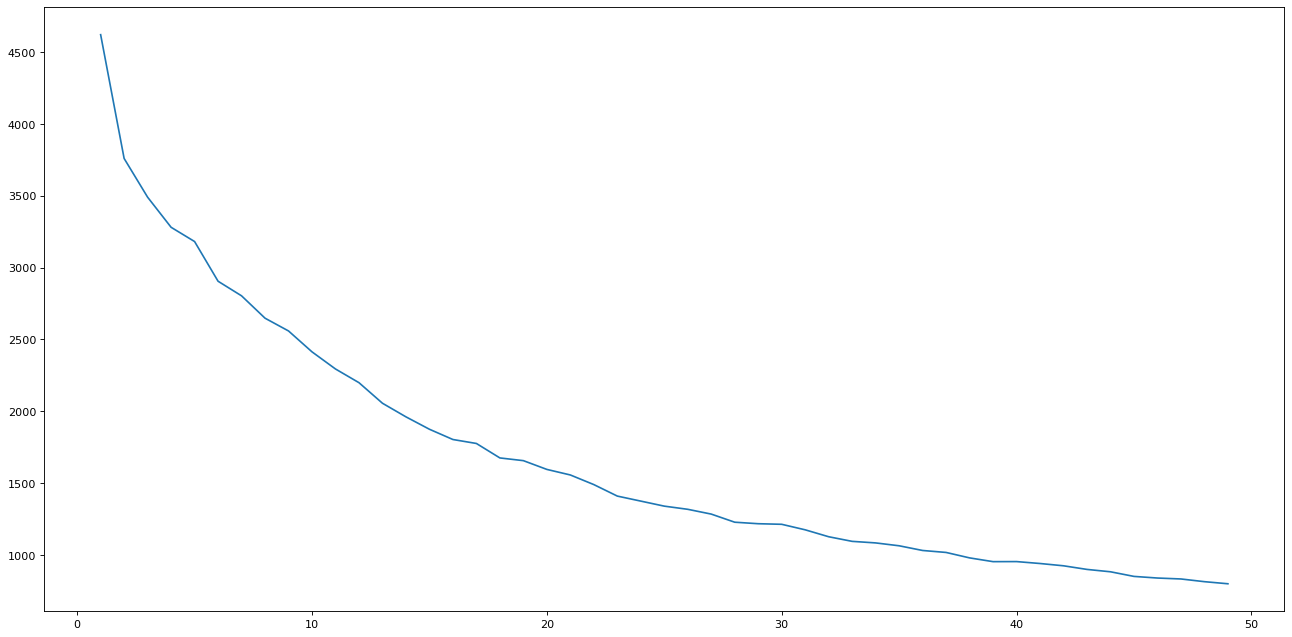

In [106]:
# on plot l'inertia en fonction du nb de clusters sur tout le df
from matplotlib.pyplot import figure
figure(figsize=(20,10), dpi=80)

x=range(1,50)
plt.plot(x,inertia_kmeans_all)

# on voit pas le elbow qu'on est censés observer: trop de données

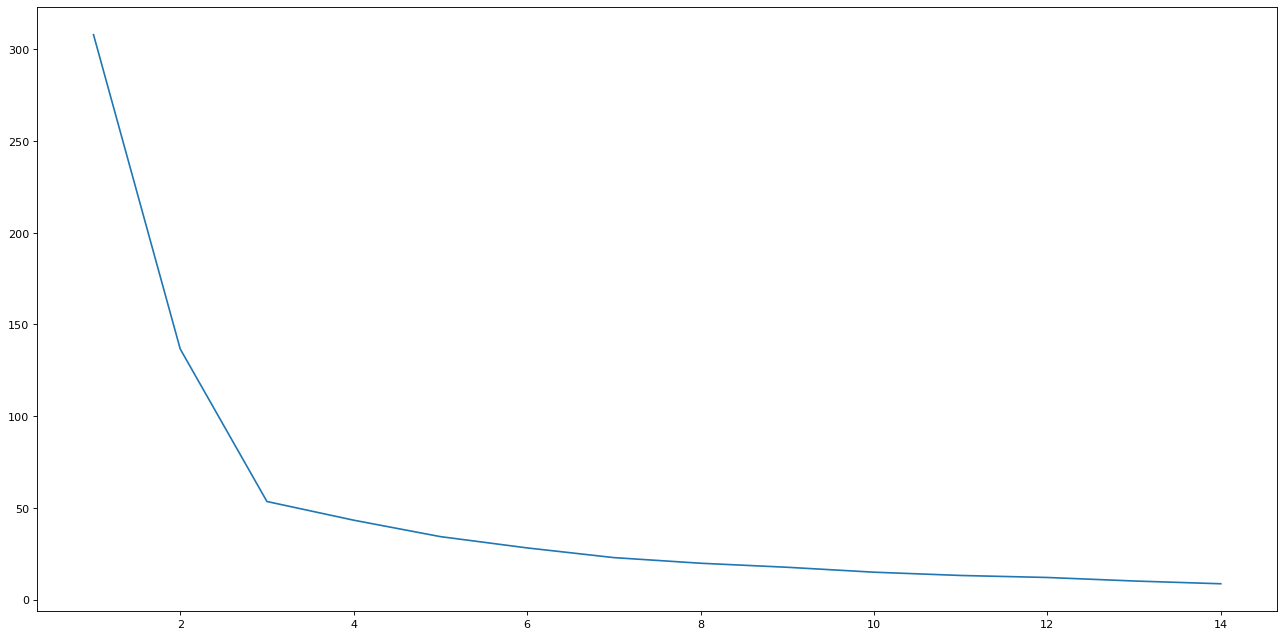

In [113]:
df_obesity_deaths=fat_quantity_scaled[["Obesity","Deaths"]]
inertia_kmeans_obesity=[]
for nb_clusters in range(1,15):
    kmeans=KMeans(n_clusters=nb_clusters)
    kmeans.fit(df_obesity_deaths)
    inertia_kmeans_obesity.append(kmeans.inertia_)

x=range(1,15)
figure(figsize=(20,10), dpi=80)
plt.plot(x,inertia_kmeans_obesity)

# n_cluster = 3

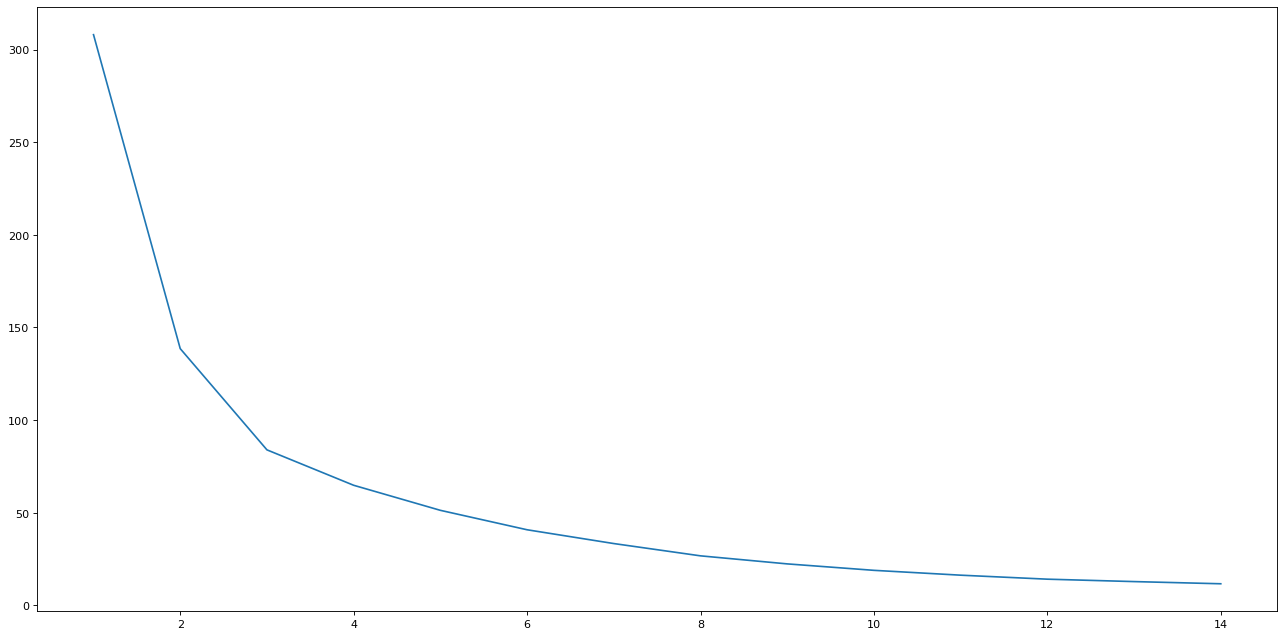

In [112]:
df_animalfats_deaths=fat_quantity_scaled[["Animal fats","Deaths"]]
inertia_kmeans_animalfats=[]
for nb_clusters in range(1,15):
    kmeans=KMeans(n_clusters=nb_clusters)
    kmeans.fit(df_animalfats_deaths)
    inertia_kmeans_animalfats.append(kmeans.inertia_)

x=range(1,15)
figure(figsize=(20,10), dpi=80)
plt.plot(x,inertia_kmeans_animalfats)

# n_cluster = 2-3

In [161]:
# Avec l'algorithme KMeans qu'on a implémenté nous même en ML3.2 (on l'a stocké dans un fichier .py au préalable)

import kmeans

In [162]:
%load_ext autoreload 
%autoreload 2
# à chaque modif du fichier .py, recharge la bibliothèque de tous les modules (recharge que celles qui ont changé)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
kmean=kmeans.KMeans(k=3)

In [164]:
kmean.fit_predict(np.array(df_obesity_deaths))

KeyError: False

## Other clustering methods

We are going to explore other clustering methods, such as Mean-Shift.

You can read more about it in the next ressource:
https://scikit-learn.org/stable/modules/clustering.html


Apply the method to our datasets made of 2 variables ("Obesity" vs "Deaths")

In [2]:
# Mean-Shift
from sklearn.cluster import MeanShift, estimate_bandwidth


Plot the obtained clusters

Check out other algorithms such as DBSAN or OPTICS, why are these algorithms very interesting and in what cases? 

In [36]:
from sklearn.cluster import DBSCAN


# Classification and prediction

Given this dataset and the emphasis we have already laid on deaths through clustering, it would be interesting to study this dataset for a classification purpose and see how accurately we can predict the mortality rate in fonction of the given features.

## Creating train and test sets 

Let's separate the data into a training and testing sets using random selection.

Now drop the labels from the training set and create a new variable for the labels.

Scale the datasets.

## Random Forest

Let's try a random forest model on the prepared fat_quantity training set.

RandomForestRegressor(random_state=42)

Now we predict.

Let's perform a 10 fold cross validation.
And display the resulting scores:

## Learning Curves analysis 

Use the function seen in **Module 1 to plot learning curves with cross validation.** 

In [31]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
....

Try to interpret the obtained learning curve.

Perform a grid search to try to obtain the best hyperparameters. What is the best score that you obtained?

## SVM

Use the SVM regressor to estimate the death rate. See if you can get a better model than with the Random forest regressor.

In [28]:
from sklearn.svm import SVR

SVR(epsilon=0.2)

## Linear regression

In [3]:
from sklearn.linear_model import LinearRegression

# Dimensionality reduction

Let's take a look at the whole dataset and see if there are any clusters.

In order to do these perform and plot a PCA of 2 components.

Dimensionality reduction is a way to reduce the number of features in your dataset without having to lose much information and keep the model’s performance. Check out the Random Forest based method and PCA for dimensionality reduction in the following ressource:

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

## Random Forest feature selection

Plot the feature importance graph.

Comment the graph.

## PCA dimensionality reduction

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. Apply clustering methods on this new set of variables. Are the clusters obtained different than the clusters obtained on the "Obesity" vs "Deaths"?

Apply the Elbow method to determne the right number of clusters.

Use diverse methods to cluster the countries.